Mean MSE: Leave one out 1.0473, 10 folds 1.1142, 5 folds 1.0906, Test MSE: 1.0810
Mean MSE: Leave one out 0.9550, 10 folds 0.9845, 5 folds 0.9581, Test MSE: 0.9657
Mean MSE: Leave one out 0.8994, 10 folds 0.9652, 5 folds 0.9160, Test MSE: 0.9687
Mean MSE: Leave one out 0.8982, 10 folds 0.9197, 5 folds 0.8752, Test MSE: 0.9501
Mean MSE: Leave one out 0.9244, 10 folds 0.9374, 5 folds 0.9152, Test MSE: 0.9945


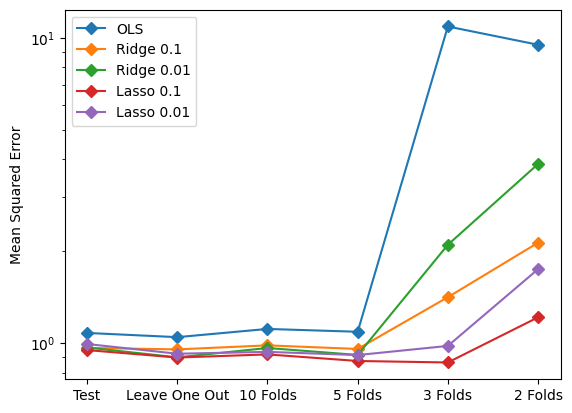

In [27]:
from numpy import empty, mean
from numpy.random import seed, uniform, normal
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import matplotlib.pyplot as plt

seed(0)

def Runge(x):
    return 1 / (1 + 25 * x**2)

VARIANCE = 1
N_POINTS = 50

x = uniform(-3, 3, N_POINTS)
y = Runge(x) + normal(0, VARIANCE, N_POINTS)
pol = PolynomialFeatures(degree=10)
test_data = uniform(-3, 3, N_POINTS)
y_true = Runge(test_data) + normal(0, VARIANCE, N_POINTS)


def cross_validation(k_folds, optimization_method):
    mean_mse = 0.
    for k in range(k_folds):
        train_idx = [i for i in range(N_POINTS) if i%k_folds!=k]
        test_idx = [i for i in range(N_POINTS) if i%k_folds==k]
        
        x_train = x[train_idx]
        y_train = y[train_idx]

        x_test = x[test_idx]
        y_test = y[test_idx]

        X = pol.fit_transform(x_train.reshape(-1, 1))

        scalar = StandardScaler()
        X = scalar.fit_transform(X)
        y_mean = y_train.mean()
        y_train -= y_mean
        y_train -= y_mean

        reg = optimization_method.fit(X, y_train)

        y_pred = reg.predict(scalar.transform(pol.transform(x_test.reshape(-1, 1))))

        mse = mean_squared_error(y_test, y_pred)

        mean_mse += mse / k_folds

    return mean_mse


for optimization_method, name in [
        (LinearRegression(), "OLS"),
        (Ridge(alpha=0.1), "Ridge 0.1"),
        (Ridge(alpha=0.01), "Ridge 0.01"),
        (Lasso(alpha=0.1), "Lasso 0.1"),
        (Lasso(alpha=0.01), "Lasso 0.01")
    ]:

    mean_mse_LEAVE_ONE_OUT = cross_validation(N_POINTS, optimization_method)
    mean_mse_10_FOLDS = cross_validation(10, optimization_method)
    mean_mse_5_FOLDS = cross_validation(5, optimization_method)
    mean_mse_3_FOLDS = cross_validation(3, optimization_method)
    mean_mse_2_FOLDS = cross_validation(2, optimization_method)

    scalar = StandardScaler()
    X = pol.fit_transform(x.reshape(-1, 1))
    X = scalar.fit_transform(X)
    y_center = y - y.mean()

    reg = optimization_method.fit(X, y_center)
    y_pred = reg.predict(scalar.transform(pol.transform(x.reshape(-1, 1)))) + y.mean()

    print(f"Mean MSE: Leave one out {mean_mse_LEAVE_ONE_OUT:.4f}, 10 folds {mean_mse_10_FOLDS:.4f}, 5 folds {mean_mse_5_FOLDS:.4f}, Test MSE: {mean_squared_error(y_true, y_pred):.4f}")
    plt.plot(range(6), [mean_squared_error(y_true, y_pred), mean_mse_LEAVE_ONE_OUT, mean_mse_10_FOLDS, mean_mse_5_FOLDS, mean_mse_3_FOLDS, mean_mse_2_FOLDS], 'D-', label=name)

plt.xticks(range(6), ['Test', 'Leave One Out', '10 Folds', '5 Folds', '3 Folds', '2 Folds'])
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')
plt.show()

We used n=50 datapoints uniformly distributed on the interval (-3, 3) to test how well cross validation predicts the accuracy of our model for OLS, Ridge and Lasso both with lambda = 0.1, 0.01. For the number of k-folds we used k = 5, 10, n and compared the prediction to another 50 points, uniformly distributed on (-3, 3). The results show that for k = 2, 3 we get estimated MSE that are not in the same magnitude as the MSE of the test data. For k = 5, 10, n we get MSE roughly like the MSE of the test data. This resembles what would be expected, as the portion of left out data of the training sinks significantly as we increase k. This trend shows for all tested optimization algorithms but was especially strong for OLS and Ridge. The exact results are in Table XXX.

**Compare cross-validation to bootstrap**

2 Bootstraps 1.2139   3 Bootstraps 1.7366   5 Bootstraps 2.0524   10 Bootstraps 28.6973   50 Bootstraps 38.4246   1000 Bootstraps 15903.2383   
2 Bootstraps 4.4167   3 Bootstraps 28.5042   5 Bootstraps 2.7183   10 Bootstraps 50.5575   50 Bootstraps 9.9451   1000 Bootstraps 24.5091   
2 Bootstraps 3.1652   3 Bootstraps 3.0216   5 Bootstraps 10.4829   10 Bootstraps 2.9570   50 Bootstraps 761.5799   1000 Bootstraps 17.4316   
2 Bootstraps 0.9597   3 Bootstraps 1.1046   5 Bootstraps 1.1401   10 Bootstraps 1.2527   50 Bootstraps 2.0934   

c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.515e+01, tolerance: 3.673e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+01, tolerance: 3.436e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

1000 Bootstraps 1.3893   
2 Bootstraps 1.3022   3 Bootstraps 1.3838   5 Bootstraps 11.9725   10 Bootstraps 1.2891   50 Bootstraps 1.2925   

c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+01, tolerance: 3.891e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+01, tolerance: 4.519e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

1000 Bootstraps 1.6348   


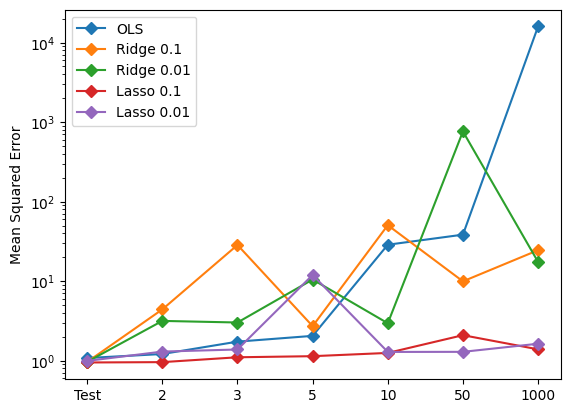

In [28]:
n_bootstraps = [2, 3, 5, 10, N_POINTS, 1_000]

y_true = y_true.reshape(-1, 1)
def bootstrap(optimization_method, name):

    error = []

    for i, n in enumerate(n_bootstraps):
        y_pred = empty((test_data.shape[0], n))
        for j in range(n):
            x_, y_ = resample(x, y)

            X = pol.fit_transform(x_.reshape(-1, 1))

            # print(i, n, j)
            y_pred[:, j] = optimization_method.fit(X, y_).predict(pol.transform(test_data.reshape(-1, 1))).ravel()

        error.append(mean( mean((y_true - y_pred)**2, axis=1, keepdims=True) ))

        print(f"{n} Bootstraps {error[i]:.4f}", end="   ")
    
    print()
    scalar = StandardScaler()
    X = pol.fit_transform(x.reshape(-1, 1))
    X = scalar.fit_transform(X)
    y_center = y - y.mean()

    reg = optimization_method.fit(X, y_center)
    y_pred = reg.predict(scalar.transform(pol.transform(x.reshape(-1, 1)))) + y.mean()

    plt.plot(range(len(n_bootstraps)+1), [mean_squared_error(y_true, y_pred)] + error, 'D-', label=name)

for optimization_method, name in [
        (LinearRegression(), "OLS"),
        (Ridge(alpha=0.1), "Ridge 0.1"),
        (Ridge(alpha=0.01), "Ridge 0.01"),
        (Lasso(alpha=0.1), "Lasso 0.1"),
        (Lasso(alpha=0.01), "Lasso 0.01")
    ]:
    bootstrap(optimization_method, name)

plt.xticks(range(len(n_bootstraps)+1), ['Test'] + n_bootstraps)
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')
plt.show()